In [1]:
#You are hired by NASA as a Data Scientist, Congratulations!
#your first project;  you have to classify stars based on their astornomical measurements,  0 non-pulsar, 1-pulsar
#luckily astronouts gave  you a dataset after making observations through our Galaxy
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours
#which ML model gives the best?
# Because you are working in NASA, they have very clean dataset(there is no preprocessing!)
#to learn more about pulsars
#you will find your dataset inside the rar file named as "pulsar_stars.csv"
#  https://www.nasa.gov/mission_pages/GLAST/science/neutron_stars.html



# YOU HAVE ANOTHER VARIATION 
#You are hired by IBM Watson as a Data Scientist, Congratulations!
#Your first project;  you have to classify heart disesae  based on their medical measurements,  0 healthy, 1-heart disease
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours (bonus if you use a Neural Network)
#which ML model gives the best?
# Because you are working in IBM Watson, they have very clean dataset(there is no preprocessing!)

#to learn more about the Heart Disease Dataset :
#  https://archive.ics.uci.edu/ml/datasets/Heart+Disease


In [2]:
# YOU can CHOOSE use pulsar stars dataset  or  Heart Disease Classification Dataset
#solving 1 out of 2 is enough
# in both cases your task is Binary classification
# please  once again!  Send me everything in 1 file !

In [3]:
#Loading libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # library for visualization
from matplotlib import pyplot
import seaborn as sns # library for visualization
sns.set() # this command sets the seaborn chart style as the default
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from numpy import round
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

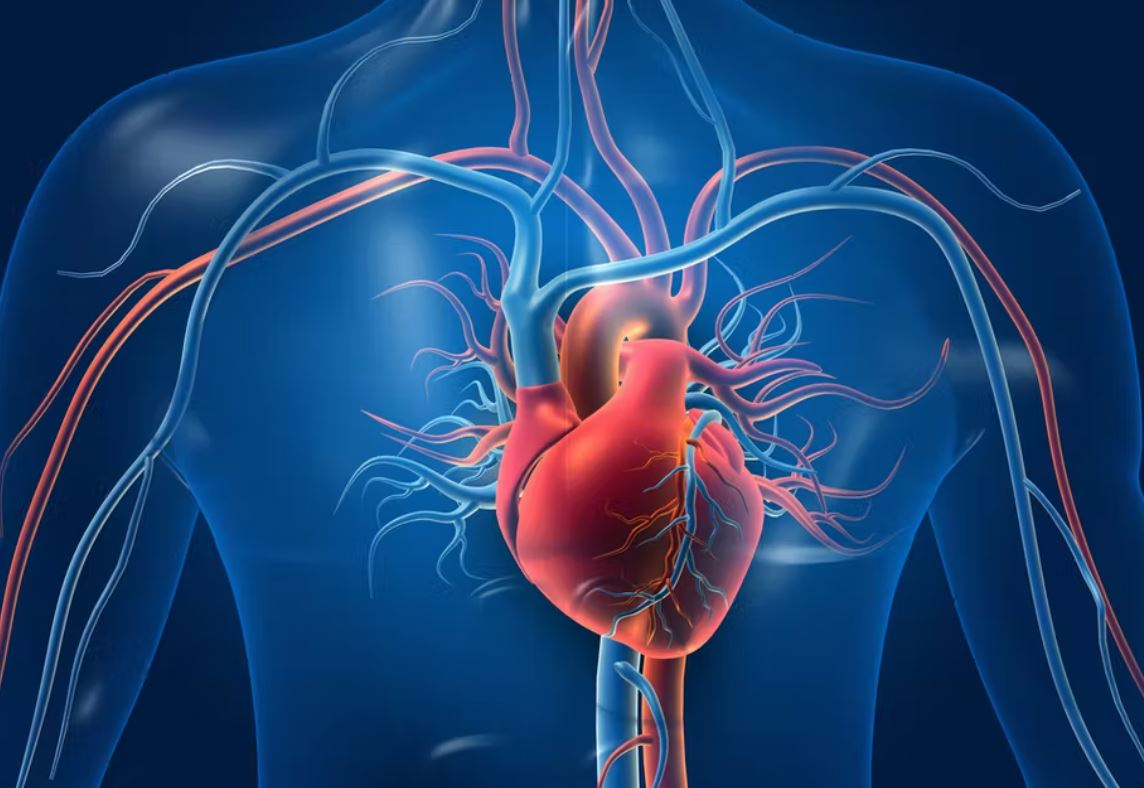

In [4]:
from IPython.display import Image
Image(filename='heart.jpg')

In [5]:
# Loading dataset
df_HD_train = pd.read_csv("HeartDiseaseDataset.csv")
df_HD_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df_HD_train.info()
df_HD_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df_HD_train.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [8]:
df1 = df_HD_train.drop(columns=["target"], axis = 1)

In [9]:
df2 = df_HD_train["target"]

In [10]:
# df_SCALE1 = preprocessing.scale(df1)

In [11]:
X_train_HD, X_test_HD, y_train_HD, y_test_HD = train_test_split(df1, df2, test_size = 0.2, random_state = 1)

In [ ]:
# Here I try to evaluate model and to choose parameters. But manually turned out more better. 
# I don't have enough skill yet. 

In [12]:
rfc = RandomForestClassifier()
kfold_HD = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfc, X_train_HD, y_train_HD.values.ravel(), cv=kfold_HD)

In [13]:
scores

array([0.88      , 0.84      , 0.75      , 0.875     , 0.875     ,
       0.875     , 0.83333333, 0.91666667, 0.75      , 0.79166667])

In [14]:
def cycle_param(sta, sto, ste):
    ar = [i for i in range(sta,sto+1,ste)]
    return(ar)

In [15]:
rf = RandomForestClassifier()
hyperparams = {
    'n_estimators': cycle_param(10, 50, 2),
    'max_depth': cycle_param(5, 30, 5)
}
# kfold_HD = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(X_train_HD, y_train_HD.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                          28, 30, 32, 34, 36, 38, 40, 42, 44,
                                          46, 48, 50]})

In [16]:
def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [17]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 5, 'n_estimators': 38}

Mean 0.823 Standard Deviation 0.078 Hyperparameters {'max_depth': 5, 'n_estimators': 10}
Mean 0.827 Standard Deviation 0.086 Hyperparameters {'max_depth': 5, 'n_estimators': 12}
Mean 0.835 Standard Deviation 0.105 Hyperparameters {'max_depth': 5, 'n_estimators': 14}
Mean 0.81 Standard Deviation 0.1 Hyperparameters {'max_depth': 5, 'n_estimators': 16}
Mean 0.852 Standard Deviation 0.128 Hyperparameters {'max_depth': 5, 'n_estimators': 18}
Mean 0.844 Standard Deviation 0.163 Hyperparameters {'max_depth': 5, 'n_estimators': 20}
Mean 0.852 Standard Deviation 0.096 Hyperparameters {'max_depth': 5, 'n_estimators': 22}
Mean 0.844 Standard Deviation 0.115 Hyperparameters {'max_depth': 5, 'n_estimators': 24}
Mean 0.839 Standard Deviation 0.092 Hyperparameters {'max_depth': 5, 'n_estimators': 26}
Mean 0.839 Standard Deviation 0.099 Hyperparameters {'max_depth': 5, 'n_estimators': 28}
Mean 0.835 Standard Deviation 0.083 Hyperparameters {'

Evaluation cross validation RandomForestClassifier: 0.809000
AUC-ROC, RFC (oob) =  0.8611111111111112
AUC-ROC, RFC (test) =  0.8021505376344087
Confusion_matrix for RandomForestClassifier:


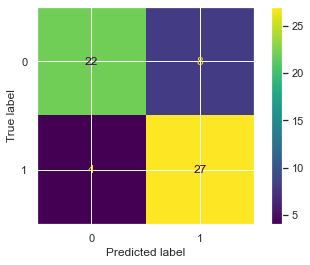

Classification_report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [18]:
# Use RandomForestClassifier model
model_RFC_HD = RandomForestClassifier(n_estimators=20, max_depth=10, oob_score=True, random_state=1)
kfold_HD = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results_RFC_HD = cross_val_score(model_RFC_HD, X_train_HD, y_train_HD.values.ravel(), 
                                    cv=kfold_HD, scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation RandomForestClassifier", cv_results_RFC_HD.mean()))
model_RFC_HD.fit(X_train_HD, y_train_HD.values.ravel())
b_HD = model_RFC_HD.predict(X_test_HD)
print ("AUC-ROC, RFC (oob) = ", roc_auc_score(y_train_HD, model_RFC_HD.oob_decision_function_[:,1]))
print ("AUC-ROC, RFC (test) = ", roc_auc_score(y_test_HD, b_HD))
print("Confusion_matrix for RandomForestClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test_HD, b_HD)
plt.show()
print("Classification_report for RandomForestClassifier:", 
      classification_report(y_test_HD, b_HD), sep="\n")

Evaluation cross validation XGBClassifier: 0.838667
Accuracy_XGBC:  0.8524590163934426
Confusion_matrix for XGBClassifier:


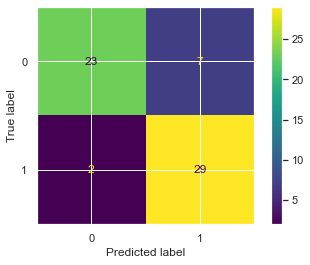

Classification_report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



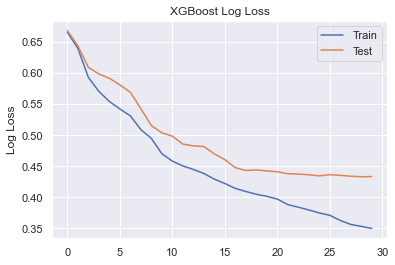

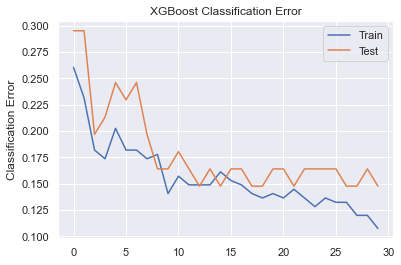

In [19]:
# Use XGBClassifier model
modelXGBC_HD = XGBClassifier(n_estimators=30, max_depth=10, subsample=0.9, colsample_bynode=0.1, 
                            use_label_encoder=False, eval_metric = "logloss", booster = 'gbtree', 
                             reg_lambda = 20)
kfold_HD = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results_XGBC_HD = cross_val_score(modelXGBC_HD, X_train_HD, y_train_HD.values.ravel(), cv=kfold_HD,
                                     scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation XGBClassifier", cv_results_XGBC_HD.mean()))
eval_set_HD = [(X_train_HD, y_train_HD), (X_test_HD, y_test_HD)]
modelXGBC_HD.fit(X_train_HD, y_train_HD, eval_set=eval_set_HD, eval_metric=["error", "logloss"], 
                 verbose=False)
y_predXGBC_HD = modelXGBC_HD.predict(X_test_HD)
accuracy_XGBC_HD = accuracy_score(y_test_HD, y_predXGBC_HD)
print("Accuracy_XGBC: ", accuracy_XGBC_HD)
print("Confusion_matrix for XGBClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test_HD, y_predXGBC_HD)
plt.show()
print("Classification_report for XGBClassifier:", 
      classification_report(y_test_HD, y_predXGBC_HD), sep="\n")
results_XGBC_HD = modelXGBC_HD.evals_result()
epochs_XGBC_HD = len(results_XGBC_HD['validation_0']['error'])
x_axis_HD = range(0, epochs_XGBC_HD)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis_HD, results_XGBC_HD['validation_0']['logloss'], label='Train')
ax.plot(x_axis_HD, results_XGBC_HD['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis_HD, results_XGBC_HD['validation_0']['error'], label='Train')
ax.plot(x_axis_HD, results_XGBC_HD['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [28]:
# Use Neural Network model
model_NN_HD = tf.keras.Sequential()
model_NN_HD.add(tf.keras.layers.Dense(6, input_shape = (13,), activation = "relu"))
model_NN_HD.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model_NN_HD.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                 metrics = ["accuracy"])

In [29]:
stp_HD = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0, patience = 10, 
                                       verbose = 0, mode = "auto")

In [30]:
history_HD = model_NN_HD.fit(X_train_HD, y_train_HD, epochs = 300, validation_split = 0.1, 
                             verbose = 0, callbacks = [stp_HD])

In [31]:
std_dict_HD = history_HD.history

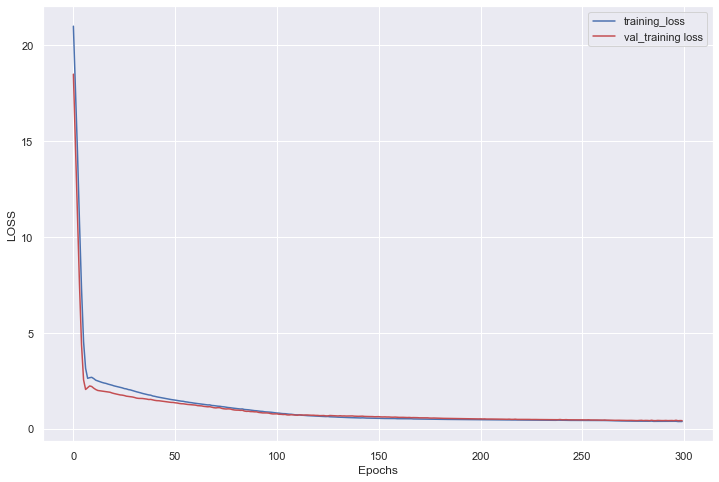

In [32]:
l_v_HD = std_dict_HD["loss"]
val_l_v_HD = std_dict_HD["val_loss"]
plt.figure(figsize = (12, 8))
plt.plot(l_v_HD, "b", label = "training_loss")
plt.plot(val_l_v_HD, "r", label = "val_training loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("LOSS")
pyplot.show()

In [33]:
loss, acc = model_NN_HD.evaluate(X_test_HD, y_test_HD)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.7705
Test loss:  0.4929504692554474
Test accuracy:  0.7704917788505554


In [34]:
y_pred_NN_HD = model_NN_HD.predict(X_test_HD)

Confusion_matrix for NN:


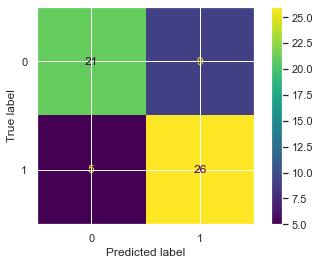

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.84      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [35]:
pred_HD = ( y_pred_NN_HD > 0.5 ).astype(int)
print("Confusion_matrix for NN:")
ConfusionMatrixDisplay.from_predictions(y_test_HD, pred_HD)
plt.show()
print(classification_report(y_test_HD, pred_HD))